In [578]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
# Read csv and remove unncessary stock attributes
df_US = pd.read_csv('./Data/df_US.csv',encoding='utf-8')
df_US_NDX = df_US.drop(['AAPL','MSFT','GOOG','AMZN','TSLA','FB','NVDA','AVGO','ADBE','CRM','ORCL','CSCO','INTC','AMD','SPY','NFLX','ZM','SHOP','FNGU'],axis=1)
# Add EMA from pandas_ta to our dataframe by appending
df_US_NDX['EMA_10'] = df_US_NDX.ta.ema(close='NDX', length=10, append=True)
df_US_NDX = df_US_NDX.replace((np.inf,-np.inf,np.nan,-np.nan),0)
df_US_NDX

,Date,NDX,New_cases,restriction_gatherings,Year_Month,CPI,Unemployment,EMA_10
0,2020-01-02,100.000000,0.0,0,2020Jan,1.8,3.5,0.000000
1,2020-01-03,99.117252,0.0,0,2020Jan,1.8,3.5,0.000000
2,2020-01-06,99.732872,0.0,0,2020Jan,1.8,3.5,0.000000
3,2020-01-07,99.709548,0.0,0,2020Jan,1.8,3.5,0.000000
4,2020-01-08,100.452541,0.0,0,2020Jan,1.8,3.5,0.000000
...,...,...,...,...,...,...,...,...
582,2022-04-25,152.534767,23361.0,2,2022Apr,7.8,3.6,156.498492
583,2022-04-26,146.634217,20962.0,2,2022Apr,7.8,3.6,154.704988
584,2022-04-27,146.562650,51169.0,2,2022Apr,7.8,3.6,153.224563
585,2022-04-28,151.665085,64426.0,2,2022Apr,7.8,3.6,152.941021


In [580]:
# Read csv and remove unncessary stock attributes
df_China = pd.read_csv('./Data/df_China.csv',encoding='utf-8', index_col=0, parse_dates=True)
df_China_FXI = df_China.drop(['3690.HK','600588.SS','BABA','BIDU','BILI','JD','KWEB','NTES','PDD','TCEHY','TCOM'],axis=1)
# # Add EMA from pandas_ta to our dataframe by appending
df_China_FXI['EMA_10'] = df_China_FXI.ta.ema(close='FXI', length=10, append=True)
df_China_FXI = df_China_FXI.replace((np.inf,-np.inf,np.nan,-np.nan),0)
df_China_FXI

,FXI,New_cases,restriction_gatherings,Year_Month,CPI,Unemployment,EMA_10
Date,,,,,,,
2020-01-02,100.000000,0.0,0,2020Jan,5.4,5.3,0.000000
2020-01-03,97.838679,0.0,0,2020Jan,5.4,5.3,0.000000
2020-01-06,98.306593,3.0,0,2020Jan,5.4,5.3,0.000000
2020-01-07,98.061489,0.0,0,2020Jan,5.4,5.3,0.000000
2020-01-08,97.994641,0.0,0,2020Jan,5.4,5.3,0.000000
...,...,...,...,...,...,...,...
2022-04-25,67.518126,8070.0,4,2022Apr,2.1,6.1,70.638599
2022-04-26,66.083536,7383.0,4,2022Apr,2.1,6.1,69.810406
2022-04-27,68.189139,8361.0,4,2022Apr,2.1,6.1,69.515630


In [581]:
# shows the general info of dataframe
df_US_NDX['Date'] = pd.to_datetime(df_US_NDX['Date'])
# df_China_FXI.info()
df_US_NDX.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    587 non-null    datetime64[ns]
 1   NDX                     587 non-null    float64       
 2   New_cases               587 non-null    float64       
 3   restriction_gatherings  587 non-null    int64         
 4   Year_Month              587 non-null    object        
 5   CPI                     587 non-null    float64       
 6   Unemployment            587 non-null    float64       
 7   EMA_10                  587 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 36.8+ KB


In [582]:
# check duplicated value, no duplicated values is found
df_US_NDX[df_US_NDX.duplicated()] 
# df_China_FXI[df_China_FXI.duplicated()]   

,Date,NDX,New_cases,restriction_gatherings,Year_Month,CPI,Unemployment,EMA_10


In [583]:
# check if null value exist, no null value is found
df_US_NDX.isnull().sum()
# df_China_FXI.isnull().sum()

Date                      0
NDX                       0
New_cases                 0
restriction_gatherings    0
Year_Month                0
CPI                       0
Unemployment              0
EMA_10                    0
dtype: int64

In [584]:
# check data staistic info, no abnormal value is found
df_US_NDX.describe().T.round(2)
# df_China_FXI.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NDX,587.0,142.76,27.47,78.83,122.7,147.79,165.89,186.80
New_cases,587.0,88812.75,134127.07,0.00,24505.5,51250.00,108323.00,1253135.00
restriction_gatherings,587.0,3.35,1.17,0.00,3.0,4.00,4.00,4.00
CPI,587.0,2.37,1.94,0.50,0.9,1.60,3.00,7.80
Unemployment,587.0,6.31,2.84,3.50,4.2,5.90,6.90,14.70
EMA_10,587.0,140.83,32.23,0.00,121.1,148.86,165.87,184.13


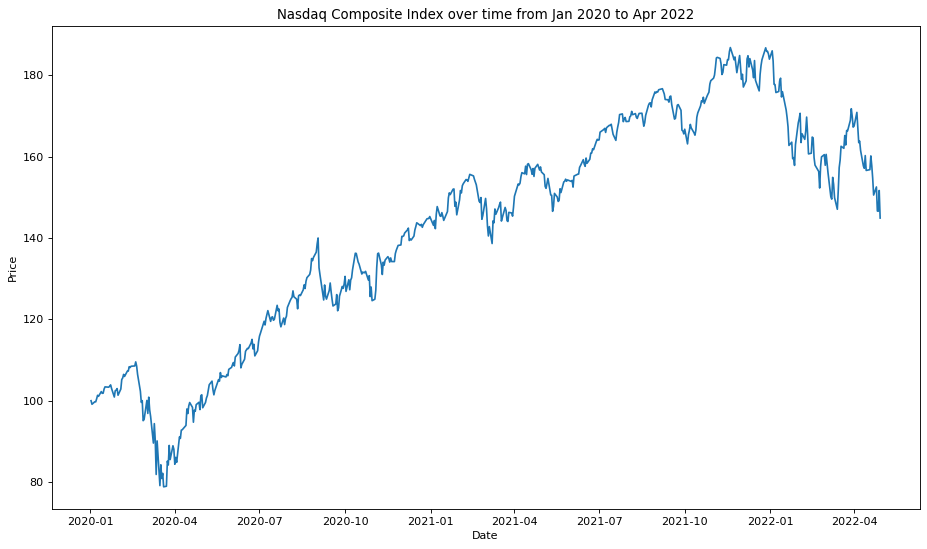

In [585]:
# Showed an upward trend for Nasdaq Composite Index since Apr 2022
# plt.rcParams['figure.figsize'] = 10,6
plt.figure(figsize=(14,8))
plt.title('Nasdaq Composite Index over time from Jan 2020 to Apr 2022')
plt.plot(df_US_NDX['Date'],df_US_NDX['NDX'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

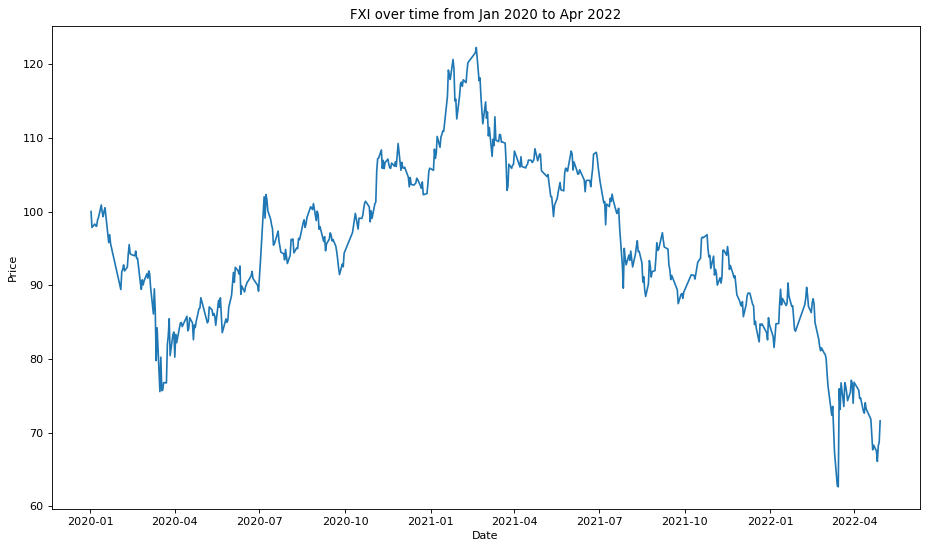

In [586]:
# Showed an upward trend for FXI Index since Apr 2022
plt.figure(figsize=(14,8))
plt.title('FXI over time from Jan 2020 to Apr 2022')
plt.plot(df_China_FXI.index,df_China_FXI.FXI)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'NDX'}>,
        <AxesSubplot:title={'center':'New_cases'}>],
       [<AxesSubplot:title={'center':'restriction_gatherings'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>],
       [<AxesSubplot:title={'center':'EMA_10'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

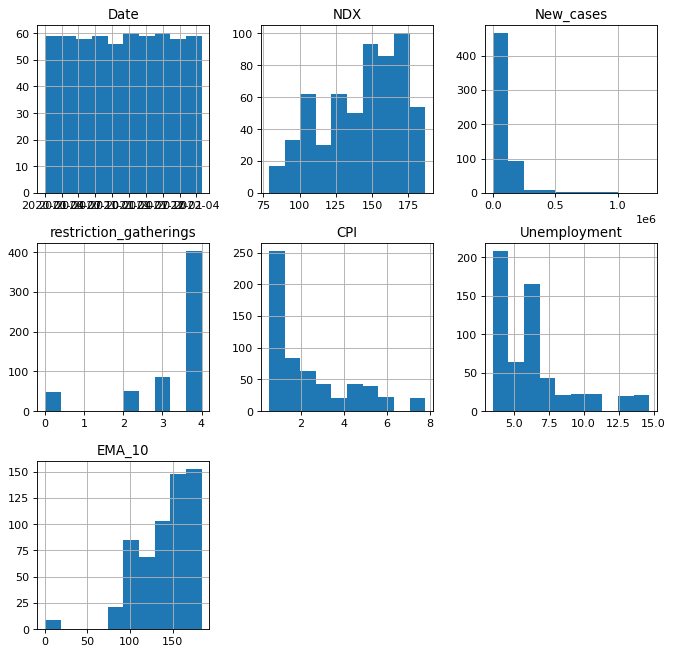

In [587]:
df_US_NDX.hist(figsize=(10, 10))        # showed skewed distribution in new cases, CPI and unemployment rate
# df_China_FXI.hist(figsize=(10, 10))

In [588]:
df_US_NDX.var().round(2)       # showed high variance in new cases
# df_China_FXI.var().round(2)

/var/folders/v0/sn6863fj5437h78v71__0rcm0000gn/T/ipykernel_4409/2683086338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_US_NDX.var().round(2)       # showed high variance in new cases


NDX                       7.546500e+02
New_cases                 1.799007e+10
restriction_gatherings    1.380000e+00
CPI                       3.760000e+00
Unemployment              8.080000e+00
EMA_10                    1.038990e+03
dtype: float64

/Users/daniel/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/daniel/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'Data distribution after log transformation with box plot'}>

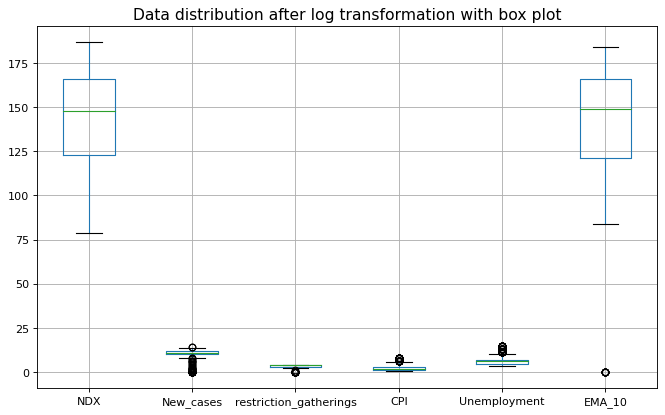

In [589]:
# perform normalisation using log transformation for each variable not normally distributed
df_US_NDX['New_cases'] = pd.DataFrame(np.log(df_US_NDX['New_cases']),columns=['New_cases'])
df_China_FXI['New_cases'] = pd.DataFrame(np.log(df_China_FXI['New_cases']),columns=['New_cases'])
# replace 0 in case of any infinite and null value to avoid error in following analysis
df_US_NDX = df_US_NDX.replace((np.inf,-np.inf,np.nan,-np.nan),0).reset_index(drop=True)
df_China_FXI = df_China_FXI.replace((np.inf,-np.inf,np.nan,-np.nan),0).reset_index(drop=True)
df_China_FXI.index = df_China.index
# show the data distribution after log transformation of new cases
plt.title('Data distribution after log transformation with box plot', fontsize=14)
df_US_NDX.boxplot(figsize=(10,6))

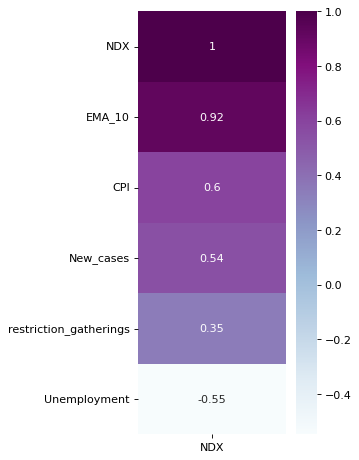

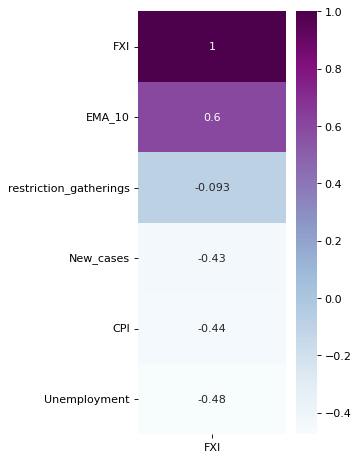

In [590]:
# Visualise the correlation matrix between target attribute (NDX) and other attributes 
corr=df_US_NDX.corr()
corr_NDX = corr['NDX']
corr_NDX = pd.DataFrame(corr_NDX,index=corr.columns,columns=['NDX'])
corr_NDX=corr_NDX.sort_values('NDX',ascending=False)
plt.rcParams['figure.figsize'] = 3,7
sns.heatmap(corr_NDX,annot=True,cmap="BuPu")
plt.show()

corr2=df_China_FXI.corr()
corr_FXI = corr2['FXI']
corr_FXI = pd.DataFrame(corr_FXI,index=corr2.columns,columns=['FXI'])
corr_FXI=corr_FXI.sort_values('FXI',ascending=False)
sns.heatmap(corr_FXI,annot=True,cmap="BuPu")
plt.show()

## 1st Data Modelling - Linear Regression, Polynomial Regression and SVR

In [591]:
# import library to implement data analytics models, which include polynomial regression and SVR 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## The US dataset

In [592]:
# place chosen independent attributes into X 
X = df_US_NDX[['EMA_10','New_cases','restriction_gatherings','CPI','Unemployment']]
# place chosen target attribute into y 
y = df_US_NDX['NDX']

In [593]:
# initialise blocking time series splitter as one of the model performance measures 
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]
            
btscv = BlockingTimeSeriesSplit(n_splits=5)

In [594]:
# initialise Time series splitter as one of the model performance measures
tscv = TimeSeriesSplit(n_splits=5)

# create and transform independent features into polynomial features
poly = PolynomialFeatures(degree=2,include_bias=False)    
poly_features = poly.fit_transform(X)

# split data into train and test data without shuffle 
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

def regression(model,x,y):
    """ split into training and testing data, train the model with training data, 
    plot a comparison graph between observed and predicted values,
    and evaluate the corresponding regression models """
    # transform poly_feature into x_train and x_test again for polynomial regression 
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, shuffle=False)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)       # run model to predict y value
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))    
    print('RMSE is: ', rmse.round(3))    # the first performance measure - RMSE
    print('Accuracy (R2) is: ', model.score(x_test,y_test).round(3))  # the second performance measure - R2
    print('Correlation coefficient (corr): ', np.corrcoef(y_pred, y_test)[0,1].round(3))    # the third performance measure - corr
    score = cross_val_score(model,x_train,y_train,cv=tscv,scoring='r2')   
    score2 = cross_val_score(model,x_train,y_train,cv=btscv,scoring='r2')               
    print('Time Series Cross validation Accuaracy: ', score.mean().round(3)) # the fourth performance measure - time series cross validation
    print('Blocking Time Series Cross validation Accuaracy: ', score2.mean().round(3))  # the fifth performance measure - blocked cross validation
    x = df_US_NDX[int(len(df_US_NDX)*0.8):]['Date']
    y = df_US_NDX[int(len(df_US_NDX)*0.8):]['NDX']
    plt.plot(x,y,color='red', label='Actual Price')      # plot a line chart to evaluate the goodness of fit between observed and predicted values
    plt.plot(x,y_pred,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()

RMSE is:  17.791
Accuracy (R2) is:  -1.294
Correlation coefficient (corr):  0.55
Time Series Cross validation Accuaracy:  -16.27
Blocking Time Series Cross validation Accuaracy:  -9.677


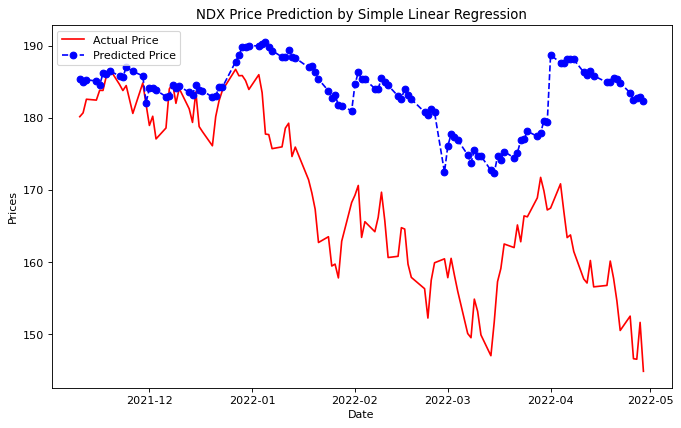

In [595]:
# create and test for Linear regression - poor result 
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 80
plt.title('NDX Price Prediction by Simple Linear Regression')
LG_model = LinearRegression()
regression(LG_model,X,y)  

RMSE is:  7.758
Accuracy (R2) is:  0.564
Correlation coefficient (corr):  0.802
Time Series Cross validation Accuaracy:  -549.679
Blocking Time Series Cross validation Accuaracy:  -15099.864


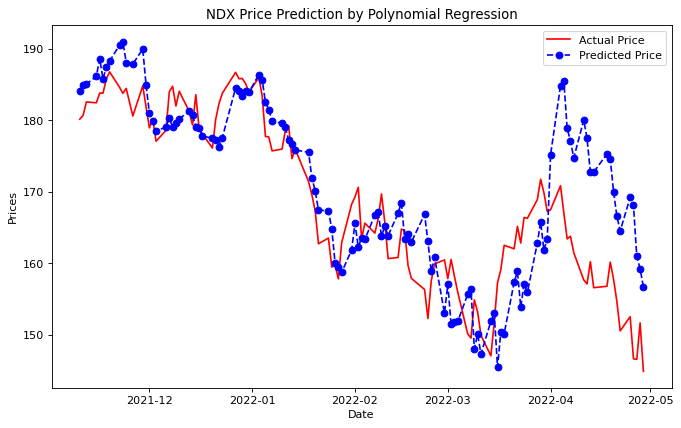

In [596]:
# create and test for Polynomial regression - better but still not good
plt.title('NDX Price Prediction by Polynomial Regression')
regression(LG_model,poly_features,y)

RMSE is:  4.961
Accuracy (R2) is:  0.822
Correlation coefficient (corr):  0.945
Time Series Cross validation Accuaracy:  -1.726
Blocking Time Series Cross validation Accuaracy:  -0.111


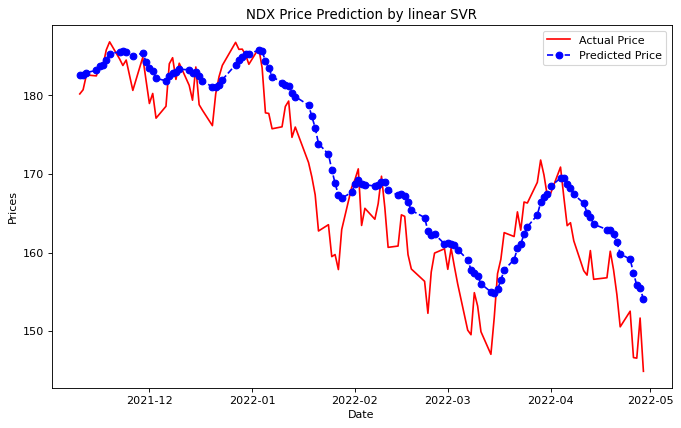

In [597]:
# create and test for SVR   -- good but underfitting result 
SVR_model = SVR(kernel='linear')
plt.title('NDX Price Prediction by linear SVR')
regression(SVR_model,X,y)

RMSE is:  3.777
Accuracy (R2) is:  0.897
Correlation coefficient (corr):  0.952
Time Series Cross validation Accuaracy:  0.136
Blocking Time Series Cross validation Accuaracy:  0.411


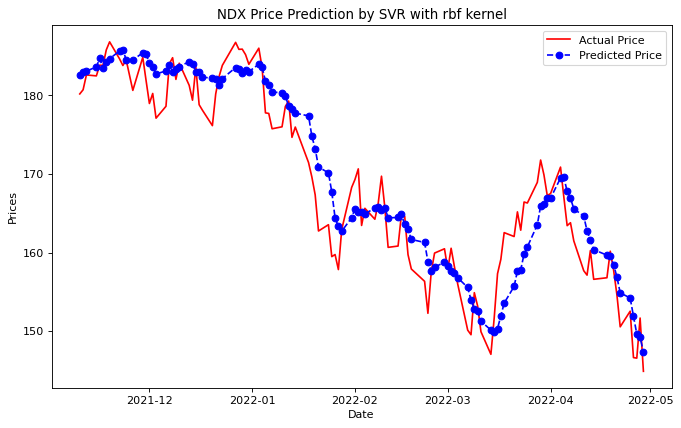

In [598]:
# test for another kernel on SVR  -- the best result among all, when very low gamma was set
SVR_model = SVR(kernel='rbf', C= 100, gamma= 0.001)
plt.title('NDX Price Prediction by SVR with rbf kernel')
regression(SVR_model,X,y)

### Performance evaluation when solely use EMA_10 as input attribute

In [599]:
# separate other attributes from the predicting attribute into X 
X = df_US_NDX[['EMA_10']]
# separate the predicting attribute into y for model training
y = df_US_NDX['NDX']
# split data into train and test data without shuffle 
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

RMSE is:  7.172
Accuracy (R2) is:  0.627
Correlation coefficient (corr):  0.948
Time Series Cross validation Accuaracy:  -10.137
Blocking Time Series Cross validation Accuaracy:  0.216


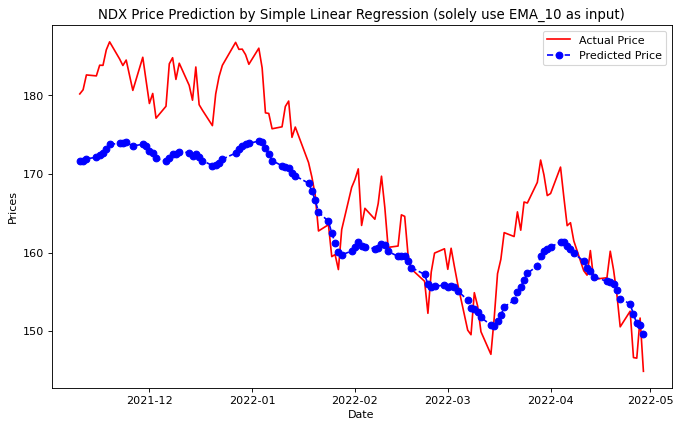

In [600]:
# create and test for Linear regression - better than previous
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 80
plt.title('NDX Price Prediction by Simple Linear Regression (solely use EMA_10 as input)')
LG_model = LinearRegression()
regression(LG_model,X,y)  

RMSE is:  7.758
Accuracy (R2) is:  0.564
Correlation coefficient (corr):  0.802
Time Series Cross validation Accuaracy:  -549.679
Blocking Time Series Cross validation Accuaracy:  -15099.864


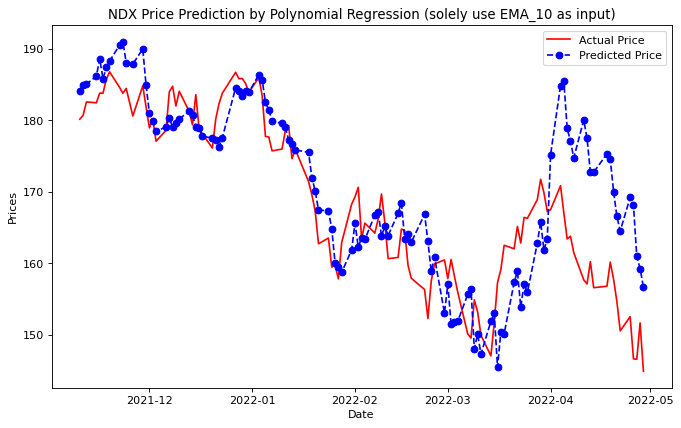

In [601]:
# create and test for Polynomial regression - good result with 2 degree parameter
plt.title('NDX Price Prediction by Polynomial Regression (solely use EMA_10 as input)')
regression(LG_model,poly_features,y)

RMSE is:  4.281
Accuracy (R2) is:  0.867
Correlation coefficient (corr):  0.948
Time Series Cross validation Accuaracy:  -0.166
Blocking Time Series Cross validation Accuaracy:  0.199


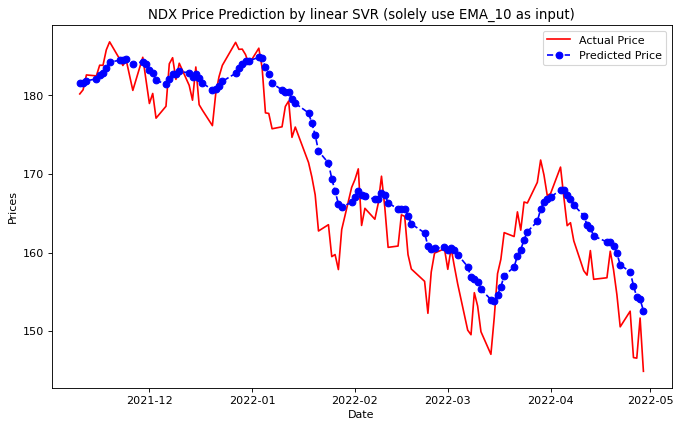

In [602]:
# create and test for SVR   -- good but underfitting result 
SVR_model = SVR(kernel='linear')
plt.title('NDX Price Prediction by linear SVR (solely use EMA_10 as input)')
regression(SVR_model,X,y)

RMSE is:  4.504
Accuracy (R2) is:  0.853
Correlation coefficient (corr):  0.948
Time Series Cross validation Accuaracy:  0.383
Blocking Time Series Cross validation Accuaracy:  0.5


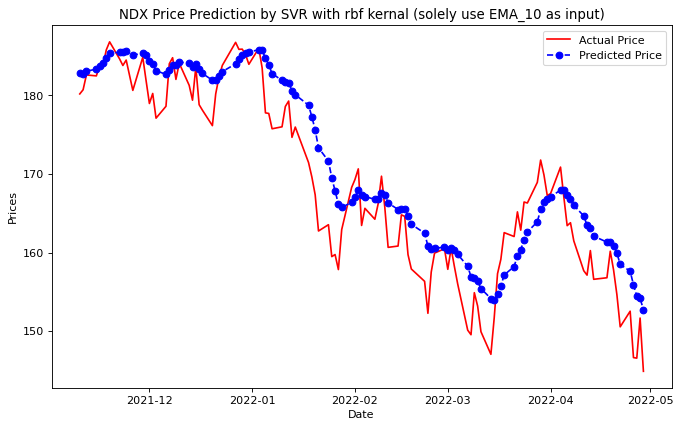

In [603]:
# test for another kernel on SVR  -- still shows good but underfitting result when very low gamma was set
SVR_model = SVR(kernel='rbf', C= 100, gamma= 0.001)
plt.title('NDX Price Prediction by SVR with rbf kernal (solely use EMA_10 as input)')
regression(SVR_model,X,y)

## China dataset

In [604]:
# place chosen independent attributes into X 
X2 = df_China_FXI[['EMA_10','New_cases','restriction_gatherings','CPI','Unemployment']]
# place chosen target attribute into y 
y2 = df_China_FXI['FXI']

In [605]:
# initialise Time series splitter as one of the model performance measures
tscv = TimeSeriesSplit(n_splits=10)

# create and transform independent features into polynomial features
poly = PolynomialFeatures(degree=2,include_bias=False)    
poly_features = poly.fit_transform(X2)

# split data into train and test data without shuffle 
x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size = 0.2, shuffle=False)

def regression(model,x,y):
    """ split into training and testing data, train the model with training data, 
    plot a comparison graph between observed and predicted values,
    and evaluate the corresponding regression models """
    x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size = 0.2, shuffle=False)
    model.fit(x_train2,y_train2)
    y_pred = model.predict(x_test2)       # run model to predict y value
    rmse = np.sqrt(mean_squared_error(y_test2, y_pred))    
    print('RMSE is: ', rmse.round(3))    # the first performance measure - RMSE
    print('Accuracy (R2) is: ', model.score(x_test2,y_test2).round(3))  # the second performance measure - R2
    print('Correlation coefficient: ', np.corrcoef(y_pred, y_test2)[0,1])    # the third performance measure - corr
    score = cross_val_score(model,x_train2,y_train2,cv=tscv,scoring='r2')   
    score2 = cross_val_score(model,x_train2,y_train2,cv=btscv,scoring='r2')               
    print('Time Series Cross validation Accuaracy: ', score.mean().round(3)) # the fourth performance measure - time series cross validation
    print('Blocking Time Series Cross validation Accuaracy: ', score2.mean().round(3))  # the fifth performance measure - blocked cross validation
    x = df_China_FXI[int(len(df_China_FXI)*0.8):].index
    y = df_China_FXI[int(len(df_China_FXI)*0.8):]['FXI']
    plt.plot(x,y,color='red', label='Actual Price')      # plot a line chart to evaluate the goodness of fit between observed and predicted values
    plt.plot(x,y_pred,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()

RMSE is:  19.004
Accuracy (R2) is:  -4.924
Correlation coefficient:  -0.3080080822180803
Time Series Cross validation Accuaracy:  -4.495
Blocking Time Series Cross validation Accuaracy:  -15.484


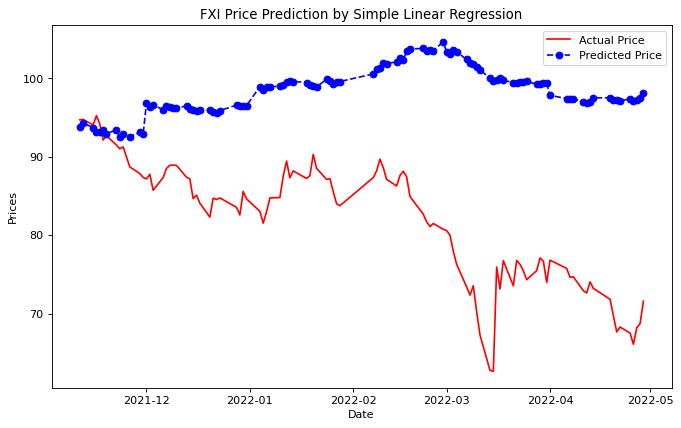

In [606]:
# create and test for Linear regression - poor result 
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 80
plt.title('FXI Price Prediction by Simple Linear Regression')
LG_model = LinearRegression()
regression(LG_model,X2,y2)  

RMSE is:  19.004
Accuracy (R2) is:  -4.924
Correlation coefficient:  -0.3080080822180803
Time Series Cross validation Accuaracy:  -4.495
Blocking Time Series Cross validation Accuaracy:  -15.484


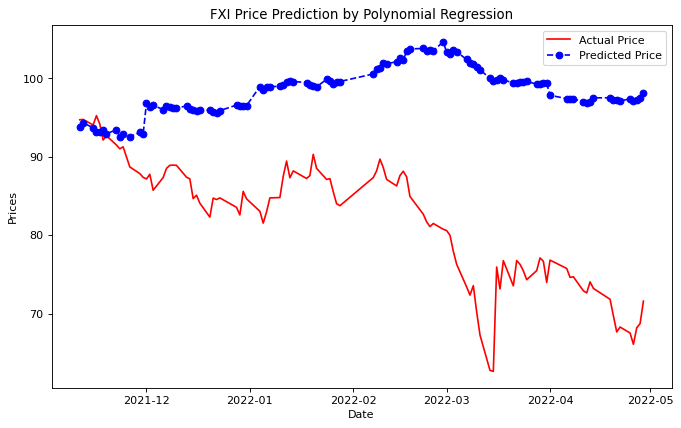

In [607]:
# create and test for Polynomial regression - good result with 2 degree parameter
plt.title('FXI Price Prediction by Polynomial Regression')
regression(LG_model,poly_features,y2)

RMSE is:  5.94
Accuracy (R2) is:  0.421
Correlation coefficient:  0.9340188460266008
Time Series Cross validation Accuaracy:  -3.007
Blocking Time Series Cross validation Accuaracy:  -0.251


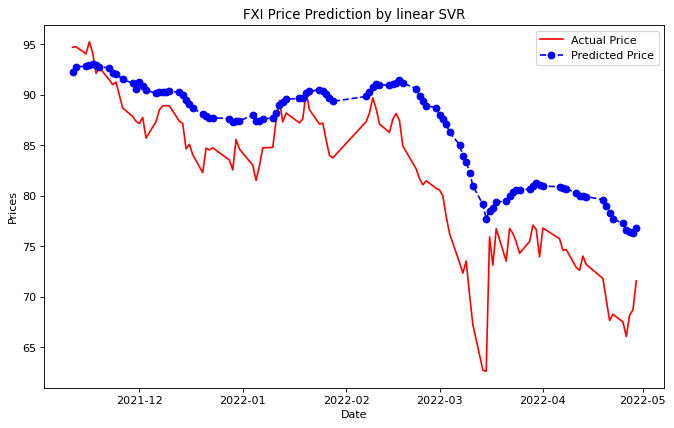

In [621]:
# create and test for SVR   -- good but underfitting result 
SVR_model = SVR(kernel='linear')
plt.title('FXI Price Prediction by linear SVR')
regression(SVR_model,X2,y2)

RMSE is:  5.121
Accuracy (R2) is:  0.57
Correlation coefficient:  0.9255865110562216
Time Series Cross validation Accuaracy:  0.228
Blocking Time Series Cross validation Accuaracy:  0.227


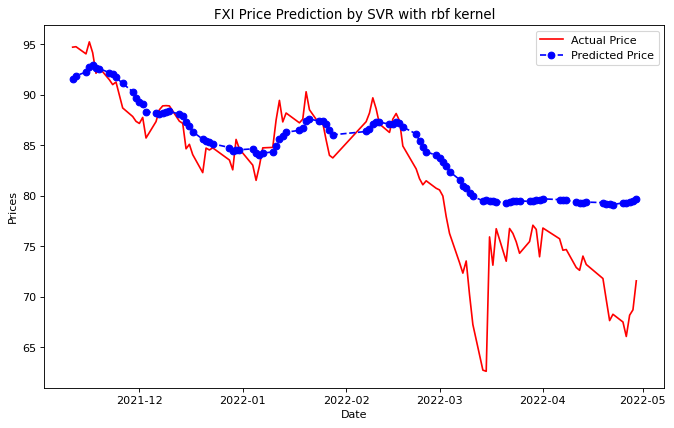

In [609]:
# test for another kernel on SVR  -- still shows good but underfitting result when very low gamma was set
SVR_model = SVR(kernel='rbf', C= 100, gamma= 0.001)
plt.title('FXI Price Prediction by SVR with rbf kernel')
regression(SVR_model,X2,y2)

## 2nd Data Modelling - ARIMA Model

### The US Dataset

In [610]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

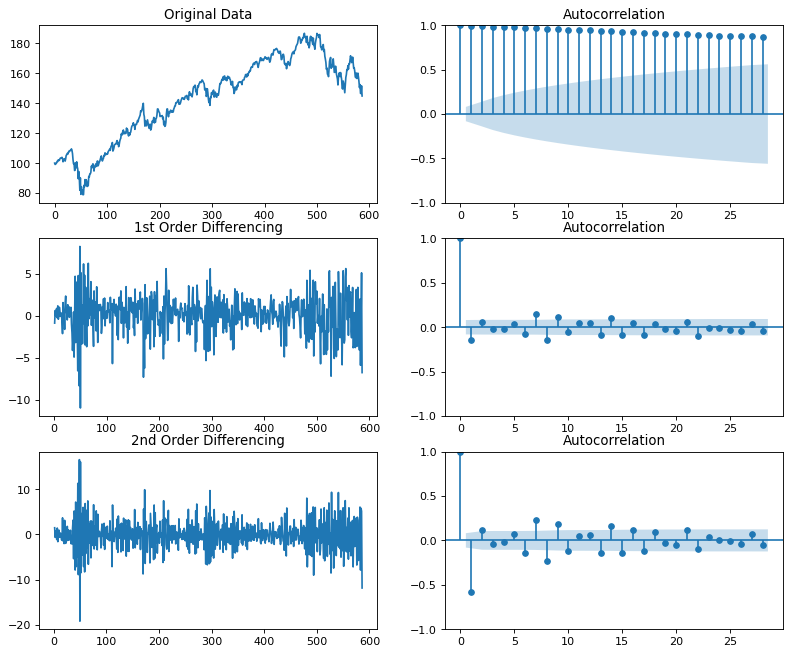

In [611]:
# Visualize the ACF plots
plt.rcParams['figure.figsize'] = 12,10
plt.rcParams['figure.dpi'] = 80

# Original Data
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_US_NDX.NDX); axes[0, 0].set_title('Original Data')
plot_acf(df_US_NDX.NDX, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_US_NDX.NDX.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_US_NDX.NDX.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_US_NDX.NDX.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_US_NDX.NDX.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [612]:
# observe p-value to determine degree of differencing
result = adfuller(df_US_NDX.NDX.dropna())
print('p-value of original data ', result[1])

result = adfuller(df_US_NDX.NDX.diff().dropna())       
print('p-value of 1st order differencing: ', result[1])         # consider 1st order differencing as its p-value is closer to 0.05

result = adfuller(df_US_NDX.NDX.diff().diff().dropna())
print('p-value of 2nd order differencing: ', result[1])

p-value of original data  0.5074670865338564
p-value of 1st order differencing:  2.968998986537065e-11
p-value of 2nd order differencing:  1.3551693265619762e-21


In [613]:
# Train the data in a iteration loop
train_NDX = df_US_NDX.NDX[:int(len(df_US_NDX)*0.8)].values      # split the data into train and test data 
test_NDX = df_US_NDX.NDX[int(len(df_US_NDX)*0.8):].values

history = [x for x in train_NDX]            # save actual value as a list    
model_pred = []                             # create a list for storing predicted value 
N_test_observations = len(test_NDX)

for data_point in range(N_test_observations):   # loop with the number of test sample
    # model = ARIMA(history, order=(1,1,0))     # an alternative parameters
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_pred.append(yhat)                  # storing predicted value in a list
    true_test_value = test_NDX[data_point]
    history.append(true_test_value)
    
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  586
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1299.475
Date:                Fri, 12 Aug 2022   AIC                           2608.950
Time:                        22:55:19   BIC                           2630.808
Sample:                             0   HQIC                          2617.468
                                - 586                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7332      0.038    -45.772      0.000      -1.807      -1.659
ar.L2         -0.9293      0.035    -26.524      0.000      -0.998      -0.861
ma.L1          1.6418      0.048     33.859      0.0

RMSE is:  3.102
Correlation Coefficient (corr):  0.965


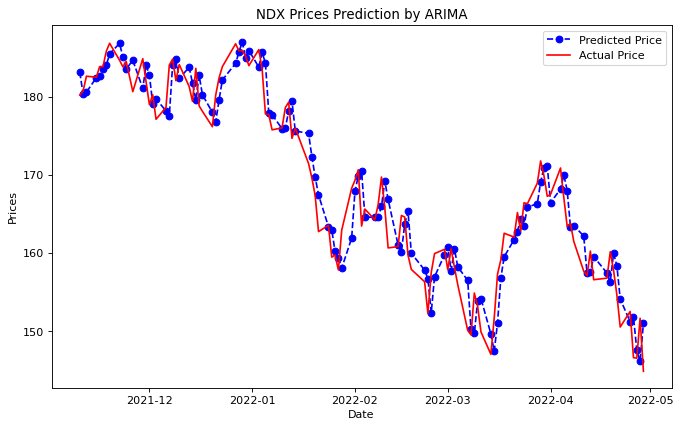

In [614]:
# showed an excellent result with ARIMA model
rmse = np.sqrt(mean_squared_error(test_NDX, model_pred))
print('RMSE is: ', rmse.round(3))                                                       # the first performance measure - RMSE
print('Correlation Coefficient (corr): ', np.corrcoef(model_pred, test_NDX)[0,1].round(3))    # the second performance measure - Correlatoin Coefficient

plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 80
test_date = df_US_NDX[int(len(df_US_NDX)*0.8):].Date
plt.plot(test_date, model_pred, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_date, test_NDX, color='red', label='Actual Price')
plt.title('NDX Prices Prediction by ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [615]:
# used auto_arima to search the best parameters with a stepwise approach 
model = pm.auto_arima(df_US_NDX.NDX, start_p=1, start_q=1,
                      test='adf',       # use adf test to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2638.597, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2648.583, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2637.419, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2638.565, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2647.226, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2638.520, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2640.509, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2636.327, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2637.356, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2637.458, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2637.484, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2639.348, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.516 seconds


### China Dataset 

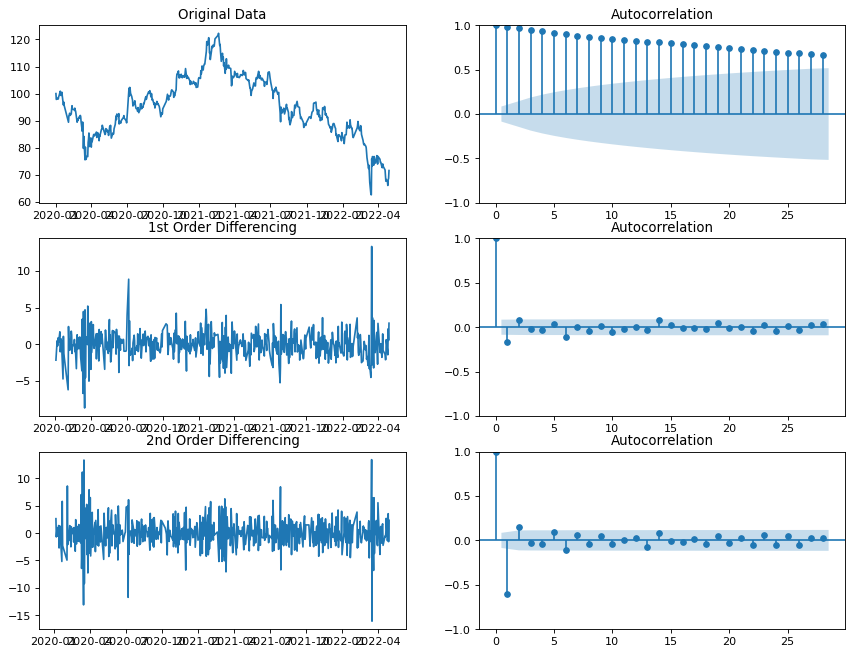

In [632]:
# Visualize the ACF plots
plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['figure.dpi'] = 80

# Original Data
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_China_FXI.FXI); axes[0, 0].set_title('Original Data')
plot_acf(df_China_FXI.FXI, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_China_FXI.FXI.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_China_FXI.FXI.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_China_FXI.FXI.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_China_FXI.FXI.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [617]:
# observe p-value to determine degree of differencing
result = adfuller(df_China_FXI.FXI.dropna())
print('p-value of original data ', result[1])

result = adfuller(df_China_FXI.FXI.diff().dropna())       
print('p-value of 1st order differencing: ', result[1])         # consider 1st order differencing as its p-value is closer to 0.05

result = adfuller(df_China_FXI.FXI.diff().diff().dropna())
print('p-value of 2nd order differencing: ', result[1])

p-value of original data  0.7017404614519831
p-value of 1st order differencing:  2.573324235639571e-29
p-value of 2nd order differencing:  1.9287032613966943e-16


In [618]:
# used auto_arima to search the best parameters with a stepwise approach 
model = pm.auto_arima(df_China_FXI.FXI, start_p=1, start_q=1,
                      test='adf',       # use adf test to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2166.353, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2178.314, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2165.829, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2167.676, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2176.747, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2165.843, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2167.826, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2164.435, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2164.375, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2166.324, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2166.352, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2164.923, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2166.018, Time=0.14 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.613 seconds


In [619]:
# Train the data in a iteration loop
train_FXI = df_China_FXI.FXI[:int(len(df_China_FXI)*0.8)].values      # split the data into train and test data 
test_FXI = df_China_FXI.FXI[int(len(df_China_FXI)*0.8):].values

history2 = [x for x in train_FXI]            # save actual value as a list    
model_pred2 = []                             # create a list for storing predicted value 
N_test_observations = len(test_FXI)

for data_point in range(N_test_observations):   # loop with the number of test sample
    model = ARIMA(history2, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_pred2.append(yhat)                  # storing predicted value in a list
    true_test_value = test_FXI[data_point]
    history2.append(true_test_value)
    
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  531
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1076.485
Date:                Fri, 12 Aug 2022   AIC                           2158.971
Time:                        22:55:23   BIC                           2171.789
Sample:                             0   HQIC                          2163.988
                                - 531                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1546      0.036     -4.330      0.000      -0.225      -0.085
ar.L2          0.0589      0.032      1.853      0.064      -0.003       0.121
sigma2         3.4017      0.105     32.501      0.0

RMSE is:  2.148
Correlation Coefficient (corr):  0.962


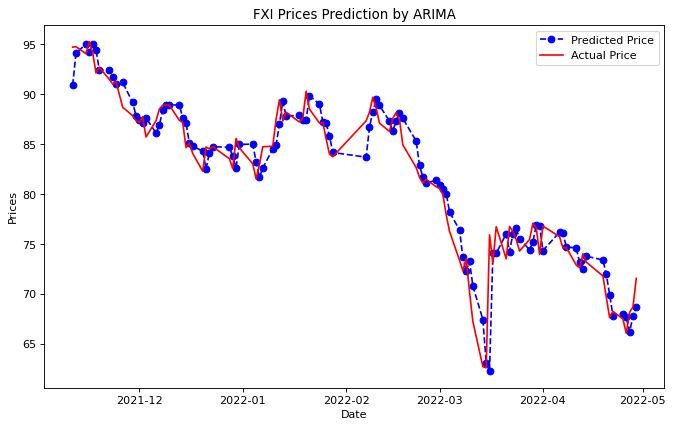

In [620]:
# showed an excellent result with ARIMA model
rmse = np.sqrt(mean_squared_error(test_FXI, model_pred2))
print('RMSE is: ', rmse.round(3))                                                       # the first performance measure - RMSE
print('Correlation Coefficient (corr): ', np.corrcoef(model_pred2, test_FXI)[0,1].round(3))    # the second performance measure - Correlatoin Coefficient

plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 80
test_date = df_China_FXI[int(len(df_China_FXI)*0.8):].index
plt.plot(test_date, model_pred2, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_date, test_FXI, color='red', label='Actual Price')
plt.title('FXI Prices Prediction by ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()